## Building regression models for boston dataset

### Import Libraries

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

In [66]:
# Temporarily Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

### Load Boston dataset

In [67]:
boston = datasets.load_boston()

### Exploring the data

In [68]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [69]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [70]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [71]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)
bostondf['PRICE']=boston.target
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
bostondf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [74]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Splitting data into train and test

In [75]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# Default: test_size=0.25, shuffle=True
# Importance of shuffling is explained in train_test_split_shuffle.ipynb

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(boston.data, boston.target, random_state=2)
print(Xtrain.shape, Xtest.shape)

(379, 13) (127, 13)


### LinearRegression with default hyperparameters

#### Fit a model on train

In [76]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [77]:
# no coef_ before fit()
# lr.coef_

In [78]:
lr.fit(Xtrain, ytrain)

LinearRegression()

In [79]:
print(lr.intercept_)

38.116141265080785


In [80]:
print(lr.coef_)

[-9.81915048e-02  3.48400626e-02 -1.65945367e-02  3.36283135e+00
 -1.61477570e+01  3.57041012e+00  4.56458846e-03 -1.39585375e+00
  3.15975518e-01 -1.20505823e-02 -1.04852815e+00  1.14536184e-02
 -5.52653040e-01]


#### Create df of coefficients

In [81]:
coefficients = pd.DataFrame(lr.coef_, index = boston.feature_names, columns = ['Coefficients'])
coefficients

,Coefficients
CRIM,-0.098192
ZN,0.034840
INDUS,-0.016595
CHAS,3.362831
NOX,-16.147757
RM,3.570410
AGE,0.004565
DIS,-1.395854
RAD,0.315976
TAX,-0.012051


#### Print the model score (R^2) on train and test

In [82]:
print('train R^2', lr.score(Xtrain, ytrain))
print('test R^2', lr.score(Xtest, ytest))

train R^2 0.7341220456408117
test R^2 0.7503116174489225


#### Predict on test, print MAE and MSE on test

In [83]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [84]:
ytest_pred = lr.predict(Xtest)

In [85]:
print("Mean absolute error", mean_absolute_error(ytest, ytest_pred))

Mean absolute error 3.241656596795038


In [86]:
# TODO: print mean squared error

In [87]:
print("Mean square error", mean_squared_error(ytest, ytest_pred))

Mean square error 22.16019830487558


#### Plot test predictions

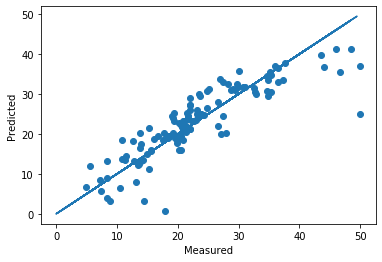

In [88]:
plt.scatter(ytest, ytest_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')

rng = np.random.RandomState(1)
x = 50 * rng.rand(100)
y=x
plt.plot(x, y);

### Explanation of polynomial features

<b>Method PolynomialFeatures() generates polynomial and interaction features.</b>

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. <b>For example, if an input sample is two dimensional and of the form [a, b], the degree=2 polynomial features are [1, a, b, a^2, ab, b^2].</b>

In [89]:
Xtrain.shape

(379, 13)

In [90]:
# PolynomialFeatures(): hyperparameter degree=2 by default
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures() 
tXtrain = poly.fit_transform(Xtrain)
tXtrain.shape

(379, 105)

### LinearRegression with PolynomialFeatures (degree=2)

In [91]:
tXtrain = poly.fit_transform(Xtrain)
tXtest = poly.transform(Xtest)

lr2 = LinearRegression()
lr2.fit(tXtrain, ytrain)

print('train R^2', lr2.score(tXtrain, ytrain))
print('test R^2', lr2.score(tXtest, ytest))

train R^2 0.9448312647133562
test R^2 0.8110446780544639


#### Pipeline of transforms with a final estimator
make_pipeline returns pipeline

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline

In [92]:
from sklearn.pipeline import make_pipeline

lrp2 = make_pipeline(PolynomialFeatures(),
                           LinearRegression())
lrp2.fit(Xtrain, ytrain)
print('train R^2', lrp2.score(Xtrain, ytrain))
print('test R^2', lrp2.score(Xtest, ytest))

train R^2 0.9448312647133562
test R^2 0.8110446780544639


In [93]:
lrp2.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression()}

In [94]:
lrp2.named_steps['linearregression'].coef_.shape

(105,)

105 variables after PolynomialFeatures(2) transformation: 1(ones) + 13 original + 13 squares of original + 78 pairwise products (12+11+...+1)

lrp2.predict() first makes polynomial features and then predicts.

### Ridge and Lasso with PolynomialFeatures (degree=2)

In [95]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

poly = make_pipeline(PolynomialFeatures(), Ridge())
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.9357293176194215
test R^2 0.8485097574892791


In [96]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html
from sklearn.linear_model import Lasso

# TODO: make pipeline of PolynomialFeatures() and Lasso() to fit Lasso model, print R^2 for train and test 

In [97]:
poly = make_pipeline(PolynomialFeatures(2), Lasso())
poly.fit(Xtrain, ytrain)
print('train R^2', poly.score(Xtrain, ytrain))
print('test R^2', poly.score(Xtest, ytest))

train R^2 0.885584796515535
test R^2 0.8566462373039525


### Hyperparameter alpha (regularization strenth) in Ridge an Lasso
#### By default alpha=1, search for optimal alpha

### Ridge

#### Gridsearch

In [98]:
# Exhaustive search - GridSearchCV. An alternative - RandomizedSearchCV.
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

from sklearn.model_selection import GridSearchCV

In [99]:
poly = make_pipeline(PolynomialFeatures(2), Ridge())

In [100]:
poly.named_steps

{'polynomialfeatures': PolynomialFeatures(), 'ridge': Ridge()}

In [101]:
grid_params = {'ridge__alpha':[0.1,1,10,100]}
grid = GridSearchCV(poly, grid_params, cv=5)

In [102]:
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.1, 1, 10, 100]})

In [103]:
grid.best_score_

0.7821385568716197

In [104]:
grid.best_params_

{'ridge__alpha': 10}

In [105]:
grid.cv_results_

{'mean_fit_time': array([0.00359769, 0.00339847, 0.00299878, 0.00279813]),
 'std_fit_time': array([0.0007988 , 0.00135604, 0.00141381, 0.00097904]),
 'mean_score_time': array([0.0013989 , 0.00139875, 0.0009995 , 0.00079956]),
 'std_score_time': array([0.00048961, 0.00079932, 0.00063211, 0.00039978]),
 'param_ridge__alpha': masked_array(data=[0.1, 1, 10, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'ridge__alpha': 0.1},
  {'ridge__alpha': 1},
  {'ridge__alpha': 10},
  {'ridge__alpha': 100}],
 'split0_test_score': array([0.865862  , 0.87855874, 0.88354815, 0.88269735]),
 'split1_test_score': array([0.83562771, 0.84527007, 0.86603337, 0.8637203 ]),
 'split2_test_score': array([0.72415892, 0.66671917, 0.61679879, 0.65699552]),
 'split3_test_score': array([0.71242109, 0.74500951, 0.79771379, 0.77770706]),
 'split4_test_score': array([0.72852365, 0.76765066, 0.74659868, 0.7041776 ]),
 'mean_test_score': array([0.77331

In [106]:
grid.score(Xtrain, ytrain)

0.9271252514160984

In [107]:
grid.score(Xtest, ytest)

0.8670001849561497

In [108]:
rbest = grid.best_estimator_
rbest.score(Xtest, ytest)

0.8670001849561497

### Lasso

#### Gridsearch

In [109]:
# Lasso default alpfa=1, tol=0.0001

# TODO: on analogy with gridsearch for Ridge
# - search best alpha and tolerance for Lasso with Polynomial Features,
# grid_params = {'lasso__alpha':[0.1,1,10,100],
#                'lasso__tol':[0.00001, 0.0001, 0.001]} 
# - print R^2 for train and test 

In [110]:
poly = make_pipeline(PolynomialFeatures(2), Lasso())

In [111]:
# Lasso default alpfa=1, tol=0.0001
grid_params = {'lasso__alpha':[0.1,1,10,100],
               'lasso__tol':[0.00001, 0.0001, 0.001]} 
grid = GridSearchCV(poly, grid_params, cv=5)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': [0.1, 1, 10, 100],
                         'lasso__tol': [1e-05, 0.0001, 0.001]})

In [112]:
grid.best_score_

0.8135799752444995

In [113]:
grid.best_params_

{'lasso__alpha': 0.1, 'lasso__tol': 1e-05}

In [114]:
grid.score(Xtrain,ytrain)

0.9090801042800674

In [115]:
grid.score(Xtest,ytest)

0.8649601322991385

### RandomForestRegressor with default hyperparameters

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
rfr = RandomForestRegressor(random_state = 2, n_jobs = -1)
rfr.fit(Xtrain, ytrain)
print(rfr.score(Xtrain, ytrain))
print(rfr.score(Xtest, ytest))

0.9789645685113162
0.8875937803413277


In [118]:
features_imp = pd.Series(rfr.feature_importances_, index=boston.feature_names)
features_imp.sort_values(ascending=False)

RM         0.415587
LSTAT      0.385019
DIS        0.063402
CRIM       0.035154
AGE        0.020414
NOX        0.019693
TAX        0.018332
PTRATIO    0.015013
B          0.013273
INDUS      0.007536
RAD        0.004620
ZN         0.001002
CHAS       0.000954
dtype: float64

### GradientBoostingRegressor with default hyperparameters

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

In [120]:
gbr = GradientBoostingRegressor(random_state = 2)
gbr.fit(Xtrain, ytrain)
print(gbr.score(Xtrain, ytrain))
print(gbr.score(Xtest, ytest))

0.9803725900157553
0.8996466353532541


In [121]:
features_imp = pd.Series(gbr.feature_importances_, index=boston.feature_names)
features_imp.sort_values(ascending=False)

LSTAT      0.428920
RM         0.360872
DIS        0.080168
NOX        0.033235
PTRATIO    0.028880
CRIM       0.019622
TAX        0.015395
AGE        0.012891
B          0.012238
INDUS      0.003390
RAD        0.002671
CHAS       0.001332
ZN         0.000386
dtype: float64